In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toyota-motors-stock-data-2980-2024/Toyota_Data.csv


# Toyota Stock Analysis (1980-2024)

## Objective
This notebook analyzes Toyota Motor Corporation's stock data from 1980 to 2024. The dataset contains daily trading records, including adjusted close prices, trading volumes, and other key metrics. Our goal is to extract insights, identify trends, and prepare the data for time-series forecasting and machine learning applications.




## **Task 0: Load the Data**

### Objective:
Load the dataset from Kaggle into a Pandas DataFrame for analysis.



In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/toyota-motors-stock-data-2980-2024/Toyota_Data.csv'
toyota_data = pd.read_csv(file_path)

# Convert 'Date' to datetime format
toyota_data['Date'] = pd.to_datetime(toyota_data['Date'])

# Display the first few rows
toyota_data.head()


,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409





## **Task 1: Check for Missing Values**

### Objective:
Identify missing values in the dataset and handle them appropriately.



In [3]:
# Check for missing values
missing_values = toyota_data.isnull().sum()

print("Missing Values:\n", missing_values)


Missing Values:
 Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64



## **Task 2: Statistical Summary**

### Objective:
Generate summary statistics for numerical columns.



In [4]:
summary_stats = toyota_data.describe()

print("Statistical Summary:\n", summary_stats)


Statistical Summary:
                                 Date     Adj Close         Close  \
count                          11291  11291.000000  11291.000000   
mean   2002-07-28 16:48:32.904082944     63.586275     72.057776   
min              1980-03-17 00:00:00      2.259452      3.237711   
25%              1991-05-15 12:00:00     19.224636     27.548208   
50%              2002-07-25 00:00:00     50.583900     66.040001   
75%              2013-10-09 12:00:00    104.705669    114.295002   
max              2024-12-27 00:00:00    254.770004    254.770004   
std                              NaN     52.272225     51.295776   

               High           Low          Open        Volume  
count  11291.000000  11291.000000  11291.000000  1.129100e+04  
mean      72.478879     71.646418     67.955424  2.146604e+05  
min        3.237711      3.237711      0.000000  0.000000e+00  
25%       27.735613     27.548208      0.000000  1.350000e+04  
50%       66.650002     65.440002     66.0000



## **Task 3: Date Range and Record Count**

### Objective:
Confirm the date range and count the total number of records.



In [5]:
# Date range and record count
start_date = toyota_data['Date'].min()
end_date = toyota_data['Date'].max()
total_records = toyota_data.shape[0]

print(f"Date Range: {start_date} to {end_date}")
print(f"Total Records: {total_records}")


Date Range: 1980-03-17 00:00:00 to 2024-12-27 00:00:00
Total Records: 11291




## **Task 4: Correlation Analysis**

### Objective:
Analyze correlations between numerical columns.



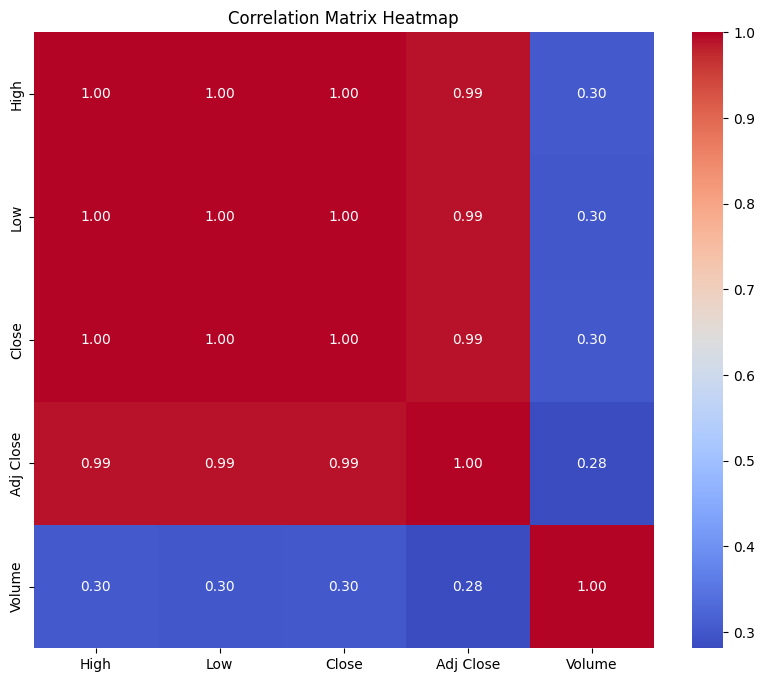

In [6]:
correlation_matrix = toyota_data[['High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()




## **Task 5: Time-Series Plot of Adjusted Close Price**

### Objective:
Visualize the adjusted close price over time.


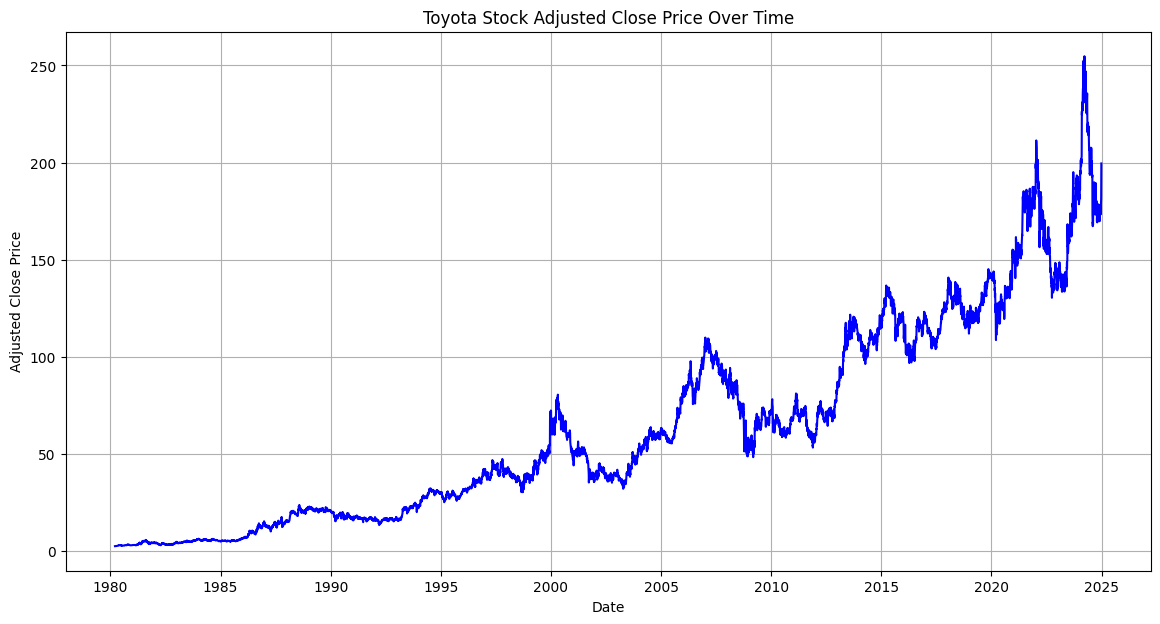

In [7]:
# Plot adjusted close price
plt.figure(figsize=(14, 7))
plt.plot(toyota_data['Date'], toyota_data['Adj Close'], color='blue')
plt.title('Toyota Stock Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid()
plt.show()




## **Task 6: Monthly Average Prices**

### Objective:
Calculate and plot the average adjusted close price by month to identify seasonal trends.



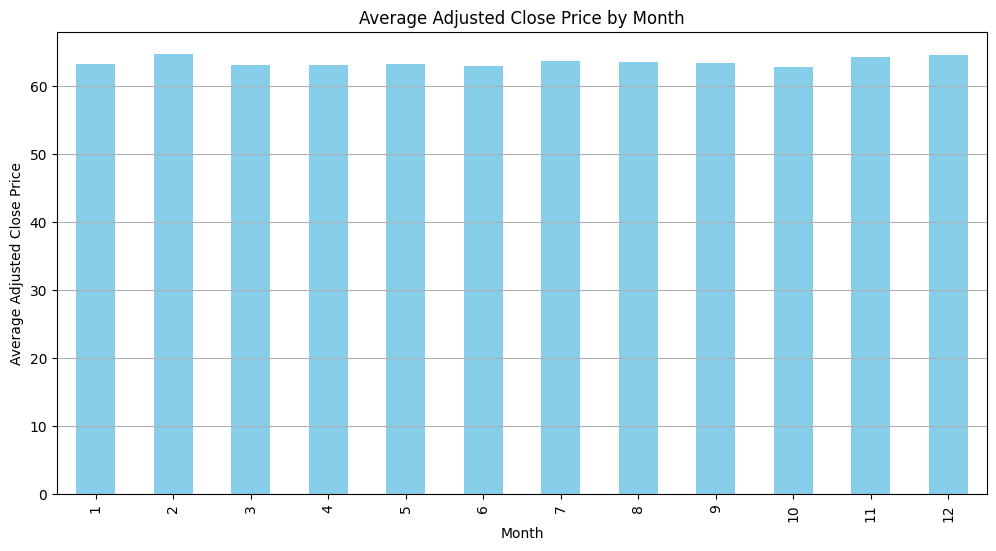

In [8]:
# Extract year and month
toyota_data['Year'] = toyota_data['Date'].dt.year
toyota_data['Month'] = toyota_data['Date'].dt.month

# Monthly average
monthly_avg = toyota_data.groupby('Month')['Adj Close'].mean()

# Plot
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Adjusted Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Adjusted Close Price')
plt.grid(axis='y')
plt.show()


## **Task 7: Yearly Trends in Adjusted Close Price**

### Objective:
Calculate yearly average adjusted close prices and visualize long-term trends.



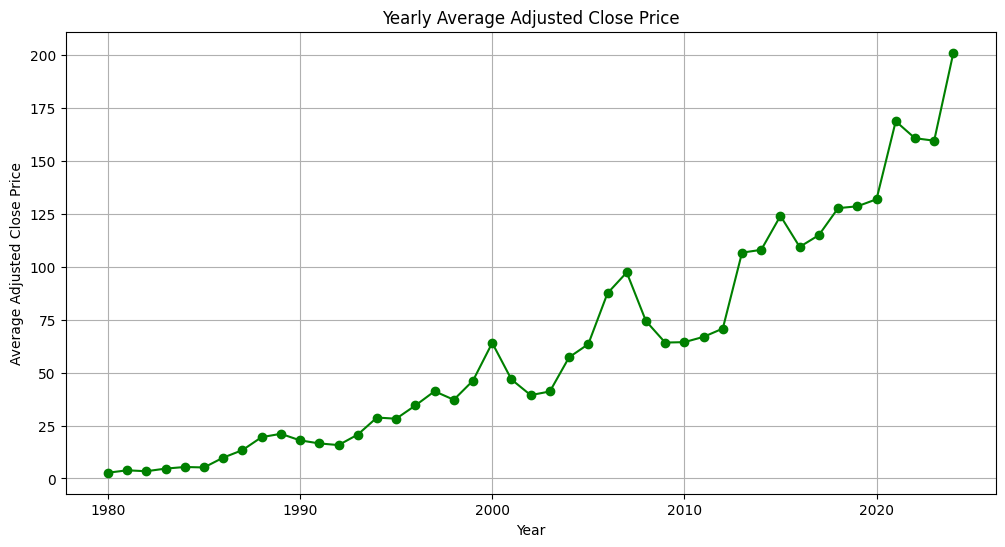

In [9]:
# Yearly average
yearly_avg = toyota_data.groupby('Year')['Adj Close'].mean()

# Plot
plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='line', marker='o', color='green')
plt.title('Yearly Average Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close Price')
plt.grid()
plt.show()



## **Task 8: Rolling Mean Analysis**

### Objective:
Apply a rolling window to smooth stock price trends and visualize medium-term movements.


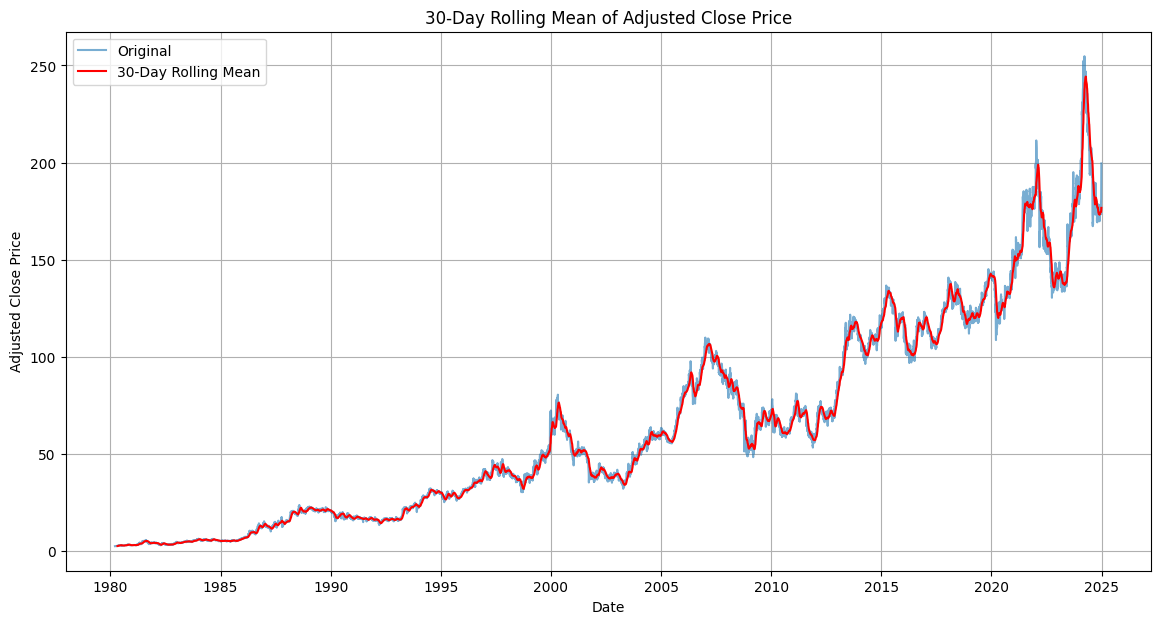

In [10]:
# Rolling mean
toyota_data['Rolling_Mean_30'] = toyota_data['Adj Close'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(toyota_data['Date'], toyota_data['Adj Close'], label='Original', alpha=0.6)
plt.plot(toyota_data['Date'], toyota_data['Rolling_Mean_30'], label='30-Day Rolling Mean', color='red')
plt.title('30-Day Rolling Mean of Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()
plt.show()





## **Task 9: Daily Percentage Change**

### Objective:
Calculate daily percentage changes in adjusted close prices to assess volatility.




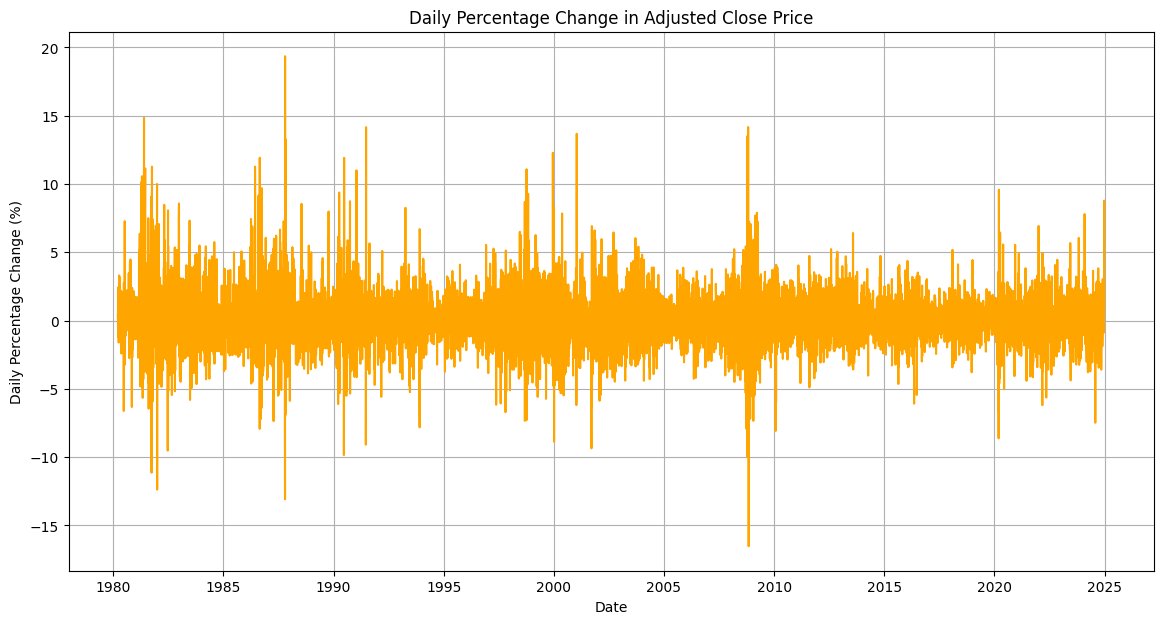

In [11]:
# Daily percentage change
toyota_data['Daily_Percent_Change'] = toyota_data['Adj Close'].pct_change() * 100

# Plot
plt.figure(figsize=(14, 7))
plt.plot(toyota_data['Date'], toyota_data['Daily_Percent_Change'], color='orange')
plt.title('Daily Percentage Change in Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')
plt.grid()
plt.show()



## **Task 10: Volume Trends Analysis**

### Objective:
Analyze trading volume trends over time and identify periods of high activity.

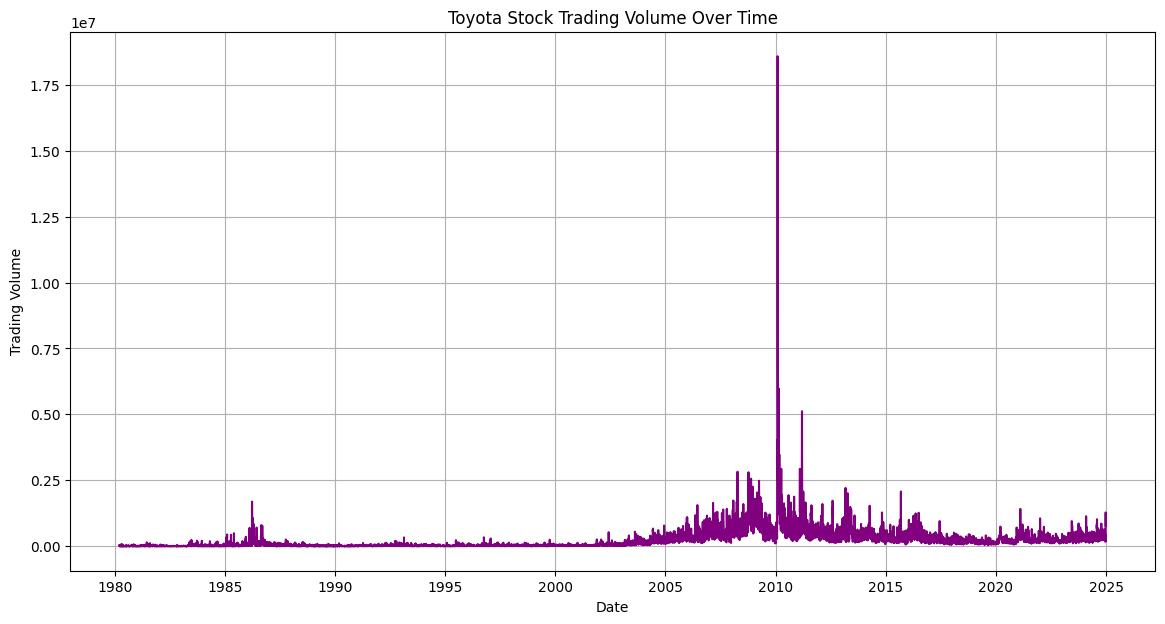

In [12]:
# Plot volume trends
plt.figure(figsize=(14, 7))
plt.plot(toyota_data['Date'], toyota_data['Volume'], color='purple')
plt.title('Toyota Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.grid()
plt.show()


---

## **Task 11: Volatility Clustering**

### Objective:
Examine periods of high and low volatility in Toyota's stock by calculating and plotting the rolling standard deviation of daily percentage changes.

---

## **Task 12: Moving Average Convergence Divergence (MACD)**

### Objective:
Compute and visualize the MACD indicator to identify momentum changes and potential buy/sell signals in Toyota's stock.

---

## **Task 13: Autocorrelation Analysis**

### Objective:
Analyze autocorrelation in the adjusted close prices to assess periodicity and potential lagged relationships.

---

## **Task 14: High-Low Price Spread Analysis**

### Objective:
Calculate the daily price spread (difference between high and low) as a percentage of the low price and identify days with unusually high spreads.

---

## **Task 15: Detecting Anomalous Trading Volumes**

### Objective:
Apply a z-score method to detect and visualize outliers in the trading volume data.

---


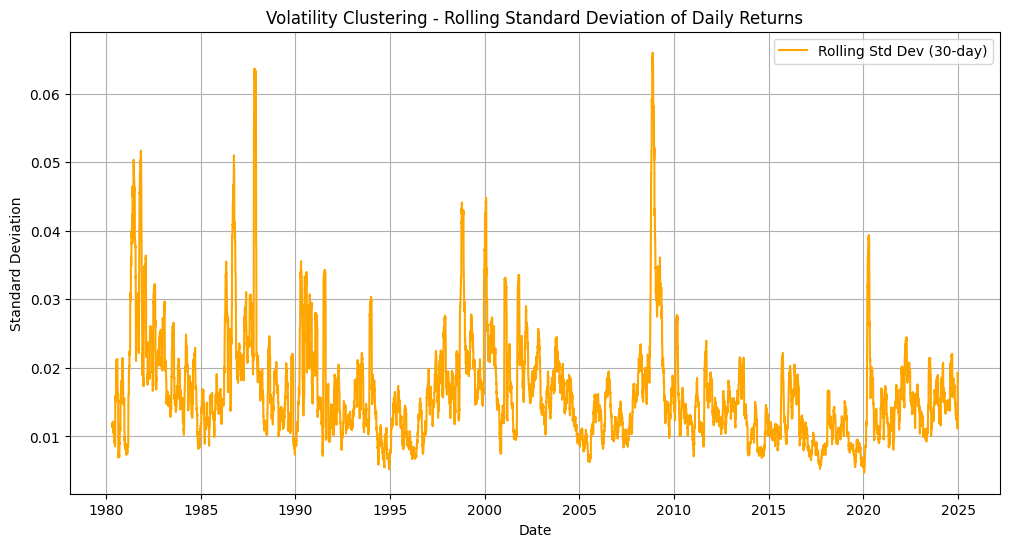

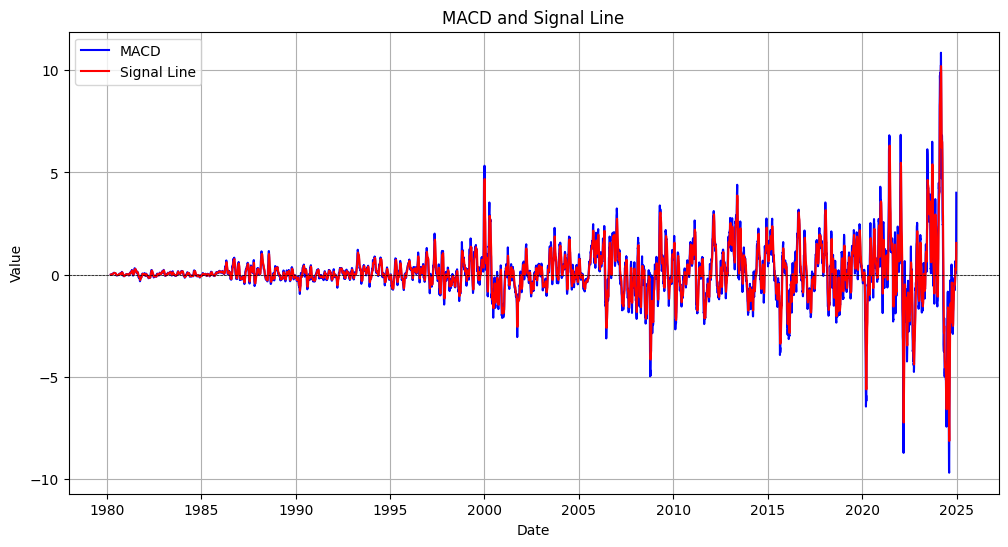

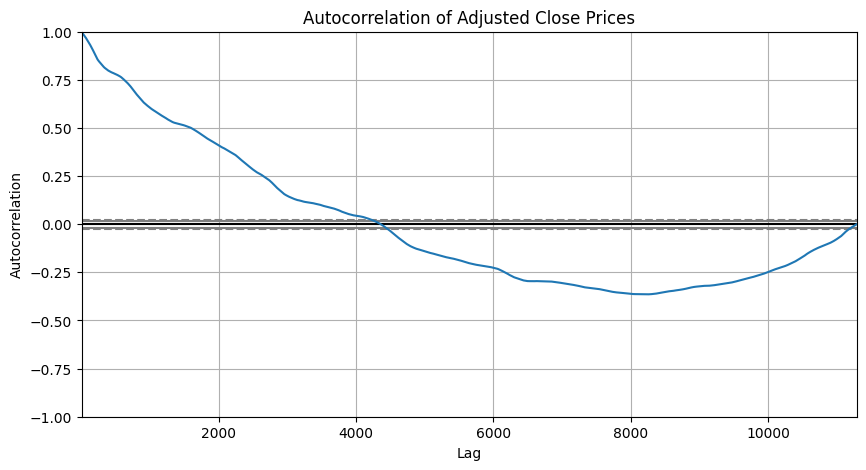

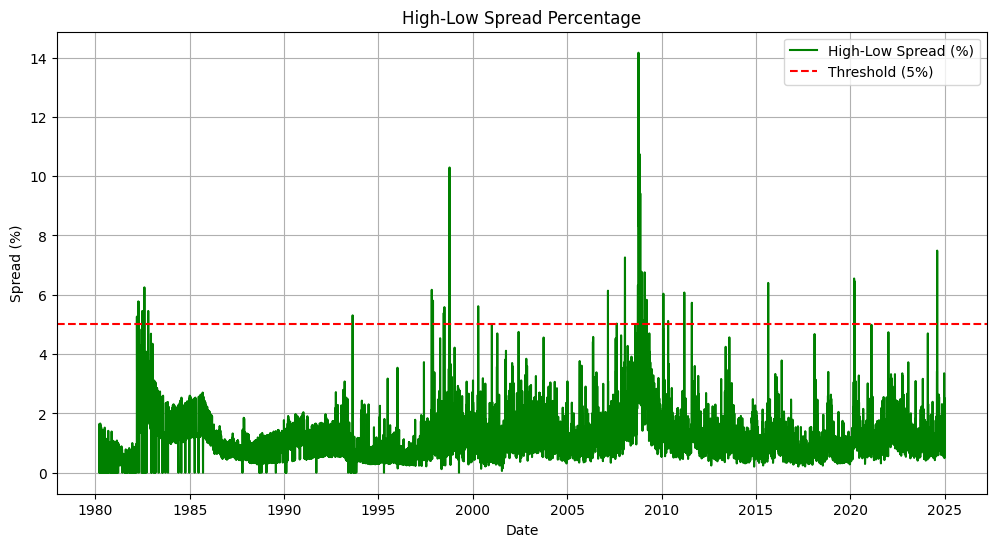

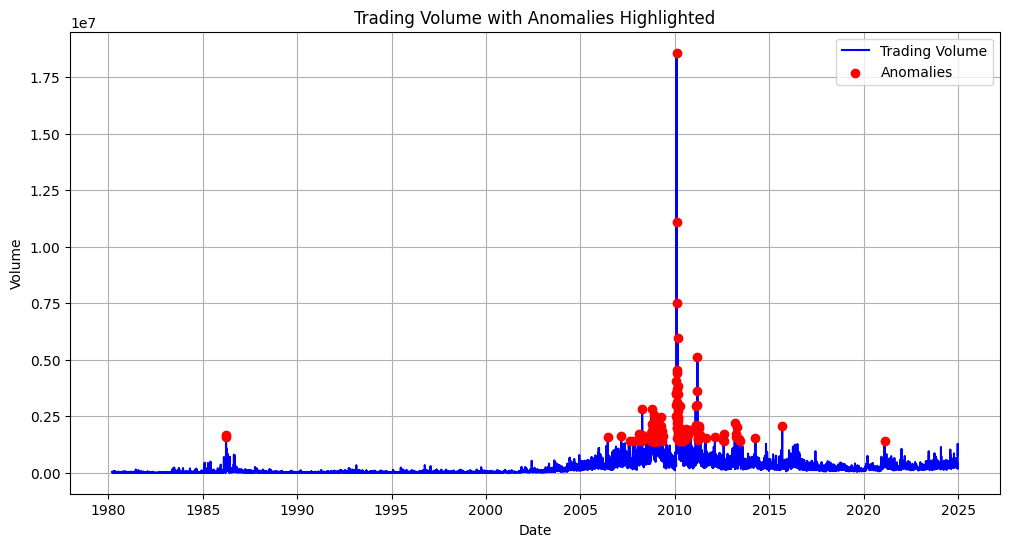

Anomalous Trading Volume Days:
            Date   Volume  Volume_Z_Score
1523  1986-03-26  1690076        3.808255
1524  1986-03-27  1571481        3.502145
6624  2006-06-14  1558900        3.469671
6802  2007-03-01  1642800        3.686229
6919  2007-08-16  1393700        3.043267
...          ...      ...             ...
8371  2013-05-23  1491500        3.295703
8381  2013-06-07  1392700        3.040686
8593  2014-04-10  1535400        3.409015
8950  2015-09-10  2073300        4.797410
10314 2021-02-10  1415500        3.099536

[136 rows x 3 columns]


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/toyota-motors-stock-data-2980-2024/Toyota_Data.csv'  
df = pd.read_csv(file_path)

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# --- Task 11: Volatility Clustering ---
# Calculate daily percentage change
df['Daily_Percent_Change'] = df['Adj Close'].pct_change()

# Rolling standard deviation (30-day window)
df['Rolling_Std'] = df['Daily_Percent_Change'].rolling(window=30).std()

# Plot rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Rolling_Std'], label='Rolling Std Dev (30-day)', color='orange')
plt.title('Volatility Clustering - Rolling Standard Deviation of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid()
plt.show()

# --- Task 12: Moving Average Convergence Divergence (MACD) ---
# Calculate MACD and Signal Line
short_ema = df['Adj Close'].ewm(span=12, adjust=False).mean()
long_ema = df['Adj Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = short_ema - long_ema
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['Signal_Line'], label='Signal Line', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# --- Task 13: Autocorrelation Analysis ---
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(df['Adj Close'].dropna())
plt.title('Autocorrelation of Adjusted Close Prices')
plt.show()

# --- Task 14: High-Low Price Spread Analysis ---
# Calculate price spread as a percentage of the low price
df['High_Low_Spread_Percent'] = ((df['High'] - df['Low']) / df['Low']) * 100

# Identify days with high spreads (greater than a chosen threshold, e.g., 5%)
high_spread_days = df[df['High_Low_Spread_Percent'] > 5]

# Plot high-low spread percentage
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High_Low_Spread_Percent'], label='High-Low Spread (%)', color='green')
plt.axhline(5, color='red', linestyle='--', label='Threshold (5%)')
plt.title('High-Low Spread Percentage')
plt.xlabel('Date')
plt.ylabel('Spread (%)')
plt.legend()
plt.grid()
plt.show()

# --- Task 15: Detecting Anomalous Trading Volumes ---
# Calculate z-scores for trading volume
df['Volume_Z_Score'] = (df['Volume'] - df['Volume'].mean()) / df['Volume'].std()

# Identify anomalies where the z-score exceeds a chosen threshold, e.g., 3
anomalies = df[np.abs(df['Volume_Z_Score']) > 3]

# Plot trading volumes with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Trading Volume', color='blue')
plt.scatter(anomalies['Date'], anomalies['Volume'], color='red', label='Anomalies', zorder=5)
plt.title('Trading Volume with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

# Display anomaly days
print("Anomalous Trading Volume Days:")
print(anomalies[['Date', 'Volume', 'Volume_Z_Score']])
